In [21]:
from astropy.io import fits
from astropy.convolution import Box1DKernel, convolve
import numpy as np
from matplotlib import pyplot
import os
import sys

In [22]:
sys.path.append('/Users/bostroem/Desktop/research/asassn15oz/code/')
import util

In [36]:
DATA_DIR = '/Volumes/dark/research/ASASSN15oz/data/EFOSC/20160919_test'
FIG_DIR = '/Volumes/dark/research/ASASSN15oz/figures'

In [24]:
filenames = ['tASASSN-15oz_20160918_Gr13_Free_slit1.5_57707_1_ex.fits', 
             'tASASSN-15oz_20160918_Gr13_Free_slit1.5_57707_2_ex.fits']

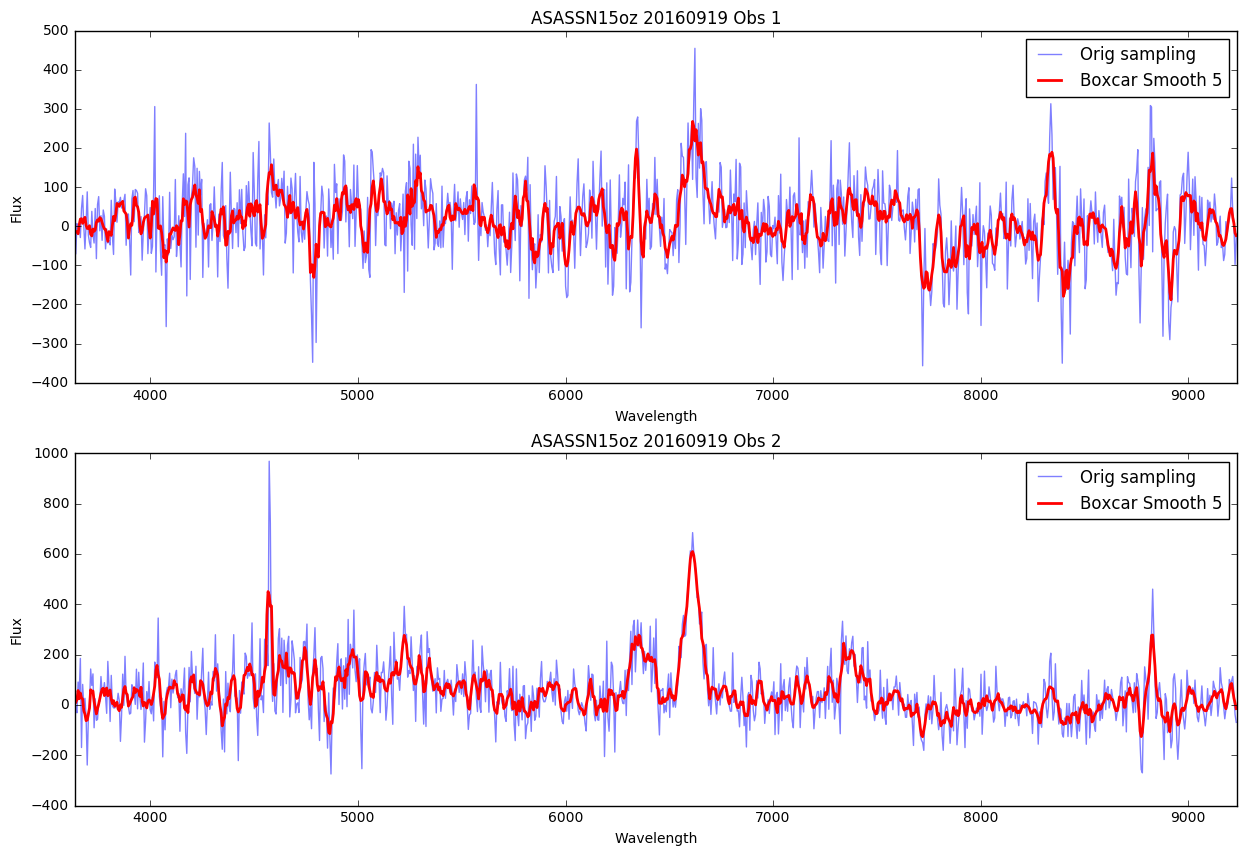

In [40]:
fig = pyplot.figure(figsize=[15, 10])
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax_list = [ax1, ax2]
for ax, ifile in zip(ax_list, filenames):
    ofile = fits.open(os.path.join(DATA_DIR, ifile))
    pix = np.arange(ofile[0].data.shape[2])+1
    wl = util.calc_wavelength(ofile[0].header, pix)
    tbdata = ofile[0].data
    ax.plot(wl, tbdata[0,0,:], alpha=0.5, label = 'Orig sampling')
    box_kernel = Box1DKernel(5)
    smoothed_data_box = convolve(tbdata[0,0,:], box_kernel)
    ax.plot(wl, smoothed_data_box, color = 'r', lw =2, label = 'Boxcar Smooth 5')
    ax.set_xlim(wl.min()-5, wl.max()+5)
    ax.set_xlabel('Wavelength')
    ax.set_ylabel('Flux')
    ax.legend(loc='best')
ax1.set_title('ASASSN15oz 20160919 Obs 1')
ax2.set_title('ASASSN15oz 20160919 Obs 2')

pyplot.savefig(os.path.join(FIG_DIR,'final_extraction_efosc20160919.pdf'))


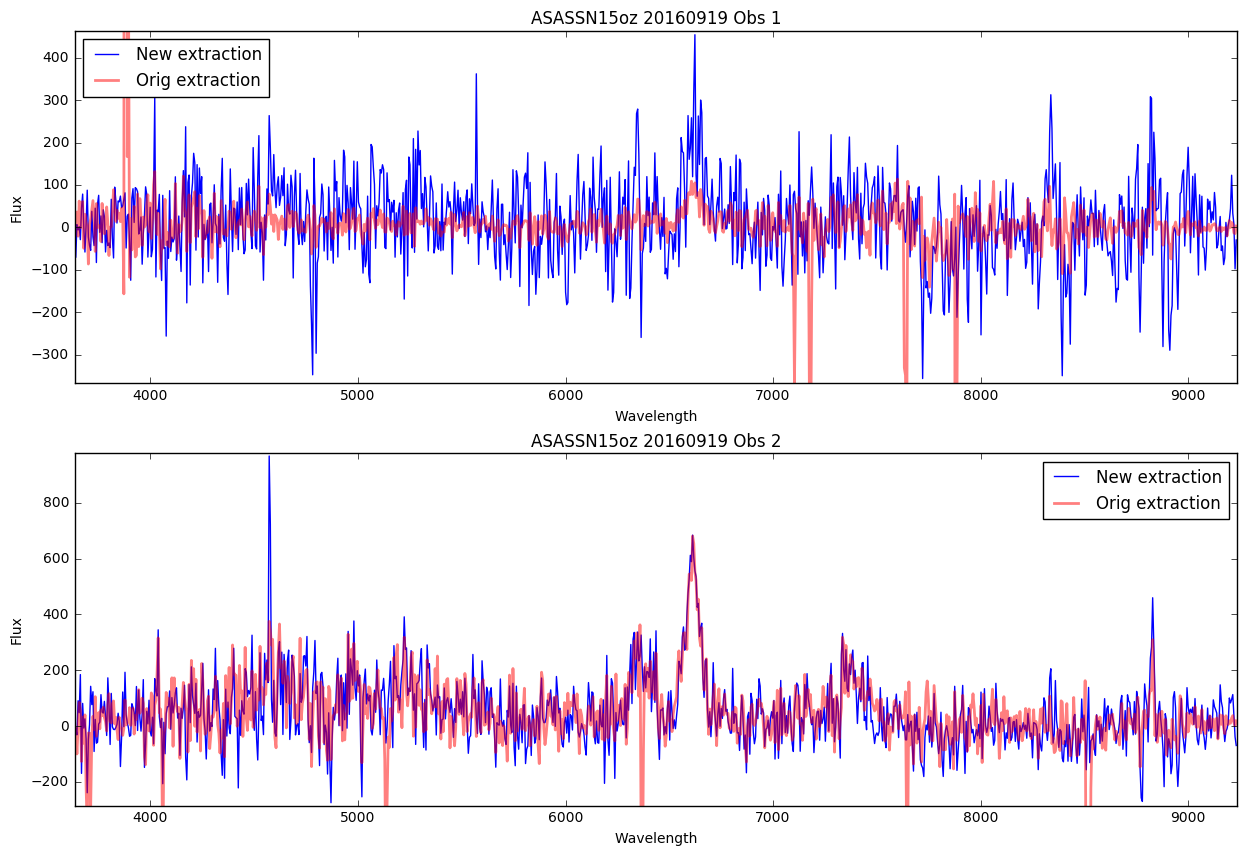

In [38]:
DATA_DIR2 = '/Volumes/dark/research/ASASSN15oz/data/EFOSC/20160919'

fig = pyplot.figure(figsize=[15, 10])
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax_list = [ax1, ax2]
for ax, ifile in zip(ax_list, filenames):
    ofile = fits.open(os.path.join(DATA_DIR, ifile))
    pix = np.arange(ofile[0].data.shape[2])+1
    wl = util.calc_wavelength(ofile[0].header, pix)
    tbdata = ofile[0].data
    ax.plot(wl, tbdata[0,0,:], label = 'New extraction')
    tbdata2 = fits.getdata(os.path.join(DATA_DIR2, ifile.replace('57707', '57706')))
    ax.plot(wl, tbdata2[0,0,:], color = 'r', lw = 2, alpha = 0.5, label='Orig extraction')
    ax.set_ylim(tbdata[0,0,:].min()-10, tbdata[0,0,:].max()+10)
    ax.set_xlim(wl.min()-5, wl.max()+5)
    ax.set_xlabel('Wavelength')
    ax.set_ylabel('Flux')
    ax.legend(loc='best')
ax1.set_title('ASASSN15oz 20160919 Obs 1')
ax2.set_title('ASASSN15oz 20160919 Obs 2')
pyplot.savefig(os.path.join(FIG_DIR,'extraction_comp_efosc20160919.pdf'))